# Model Input

In [2]:
import numpy
numpy.random.seed(12345)

import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from collections import OrderedDict
import itertools

import keras
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Input, Reshape, LSTM, GRU
from keras.regularizers import l1

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle


print('Loading Data..')
X_train = numpy.load('/Users/92306/Documents/Train_Data_C.npy')
X_test = numpy.load('/Users/92306/Documents/Test_Data_C.npy')
X_valid = numpy.load('/Users/92306/Documents/Valid_Data_C.npy')
y_train = numpy.load('/Users/92306/Documents/Train_Label_C.npy')
y_test = numpy.load('/Users/92306/Documents/Test_Label_C.npy')
y_valid = numpy.load('/Users/92306/Documents/Valid_Label_C.npy')

print('Reshaping the Data that fit the model..')
X_train = numpy.squeeze(numpy.stack((X_train,) * 3, -1))
X_test = numpy.squeeze(numpy.stack((X_test,) * 3, -1))
X_valid = numpy.squeeze(numpy.stack((X_valid,) * 3, -1))

print('Train Data:{0}, Test Data:{1}, Valid Data:{2}'.format(X_train.shape,X_test.shape,X_valid.shape))
print('Train Label:{0}, Test Label:{1}, Valid Label:{2}'.format(y_train.shape,y_test.shape,y_valid.shape))

input_shape = X_train[0].shape
num_genres = 10

print('Input Shape:{0}'.format(input_shape))
print('Number of genres:{0}'.format(num_genres))


Loading Data..
Reshaping the Data that fit the model..
Train Data:(13338, 128, 129, 3), Test Data:(1900, 128, 129, 3), Valid Data:(3762, 128, 129, 3)
Train Label:(13338, 10), Test Label:(1900, 10), Valid Label:(3762, 10)
Input Shape:(128, 129, 3)
Number of genres:10


# Model Training

In [3]:

freezed_layers = 5
print('Building Model..')
input_tensor = Input(shape=input_shape)
W = VGG16(include_top=False, weights=None,input_tensor=input_tensor)
top = Sequential()
top.add(Flatten(input_shape=W.output_shape[1:]))
# top.add(Reshape([16,512]))
# top.add(GRU(128, return_sequences=True, recurrent_dropout=0.5, input_shape=(16,512)))
# top.add(GRU(128, return_sequences=True, recurrent_dropout=0.5))
# top.add(GRU(128, return_sequences=False))
top.add(Dense(32, activation='relu'))
top.add(Dense(num_genres, activation='softmax'))

model = Model(inputs=W.input, outputs=top(W.output))
for layer in model.layers[:freezed_layers]:
    layer.trainable = False

print('Summary..')
model.summary()

print('Compiling Model')
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

print('Fitting Model')
hist = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_valid, y_valid))

## Rename Filename ##
print('Saving hist model into vgg16_c.pickle')
with open('vgg16_c.pickle','wb') as f:
	pickle.dump(hist.history, f)

model.save('Model_VGG16_C.h5')
########################################

score = model.evaluate(X_test, y_test, verbose=0)
print("Test_loss = {:.3f} and Test_acc = {:.3f}".format(score[0], score[1]))


Building Model..
Summary..
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 129, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 129, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 129, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None

# Model Results

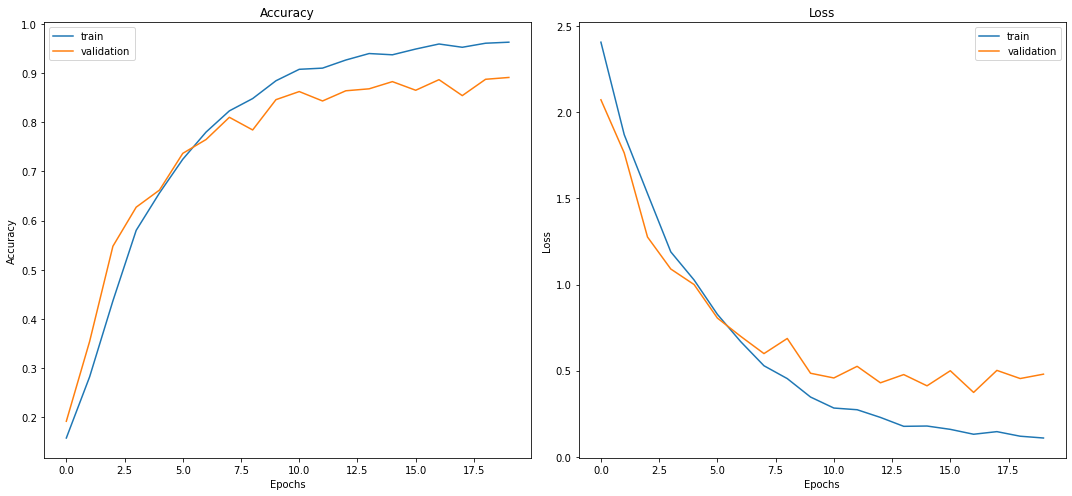

Confusion Matrix Calculating..
Normalized confusion matrix


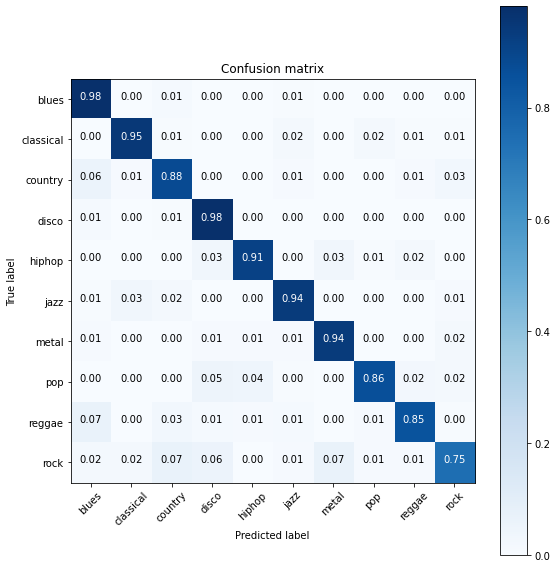

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plotting
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Confusion Matrix Calculating..')
preds = numpy.argmax(model.predict(X_test), axis = 1)
y_orig = numpy.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)
plt.show()